In [192]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [193]:
df=pd.read_csv('train.csv')

In [194]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [196]:
df.shape

(1460, 81)

In [197]:
# Checking Basic Stats of the dataframe
df.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [198]:
# Checking for  nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [199]:
#As List is long, listing columns with NULL Values
null = df.isnull().sum()/len(df)*100
print(null[null>0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [200]:
#From the list we found above, based on the data dictionary lot of column has NA value that implies absence of the feature
#which will affect the price, hence imputing the columns with none
#Creating the list that has columns with NA as significant value
col_null_significant=["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu"
,"GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [201]:
for i in col_null_significant:
    df[i].fillna("none", inplace=True)

In [202]:
#Checking the remaining columns with Null
null = df.isnull().sum()/len(df)*100
print(null[null>0])

LotFrontage    17.739726
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


In [203]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [204]:
df["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [205]:
df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [206]:
df["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [207]:
print(df["GarageYrBlt"].mode())
print(df["Electrical"].mode())

0    2005.0
Name: GarageYrBlt, dtype: float64
0    SBrkr
Name: Electrical, dtype: object


In [208]:

#df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#Imputing the continious numerical variable with median
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
#Imputing the Categorical variable with mode
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0], inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

In [209]:
#Checking the remaining columns with Null
null = df.isnull().sum()/len(df)*100
print(null[null>0])

Series([], dtype: float64)


In [210]:
#All the null values have been handled,checking all the columns that have been imputed
df["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [211]:
df["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [212]:
df["Electrical"].describe()

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object

In [213]:
df["GarageYrBlt"].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [214]:
#Checking the shape of the dataframe
df.shape
#We can see there is no loss in observations

(1460, 81)

#Initiating EDA on the Data

In [215]:
#Selecting all the numeric variables
numeric_vars = df.select_dtypes(include=['float64', 'int64'])
#Dropping the variable id
numeric_vars = numeric_vars.drop(['Id'], axis=1)
numeric_vars.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Checking Target Column Sale Price against other variables

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

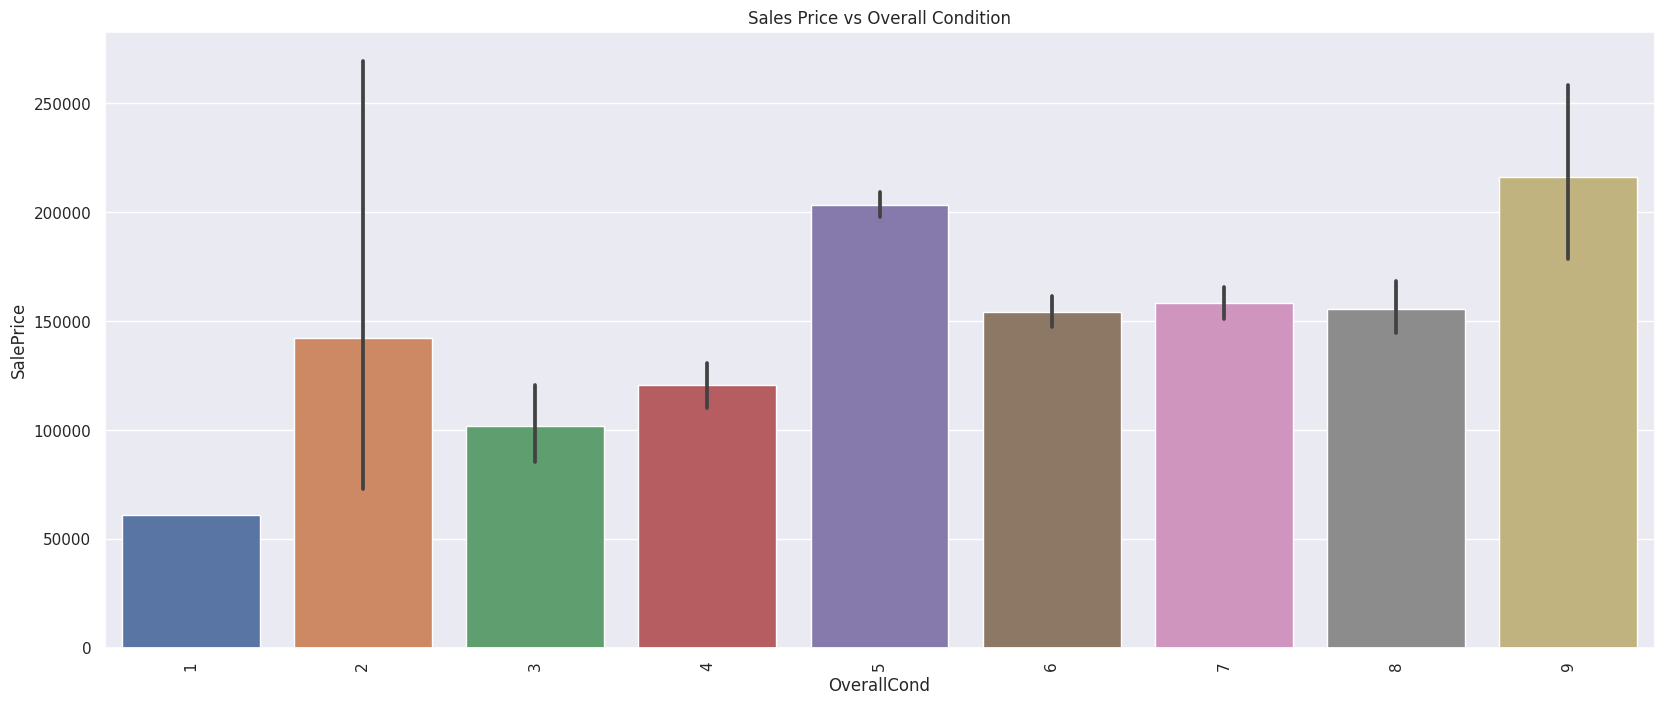

In [216]:
# Plot 'overall condition' Vs 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)

We can see prices are high for Category 5 and 9

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

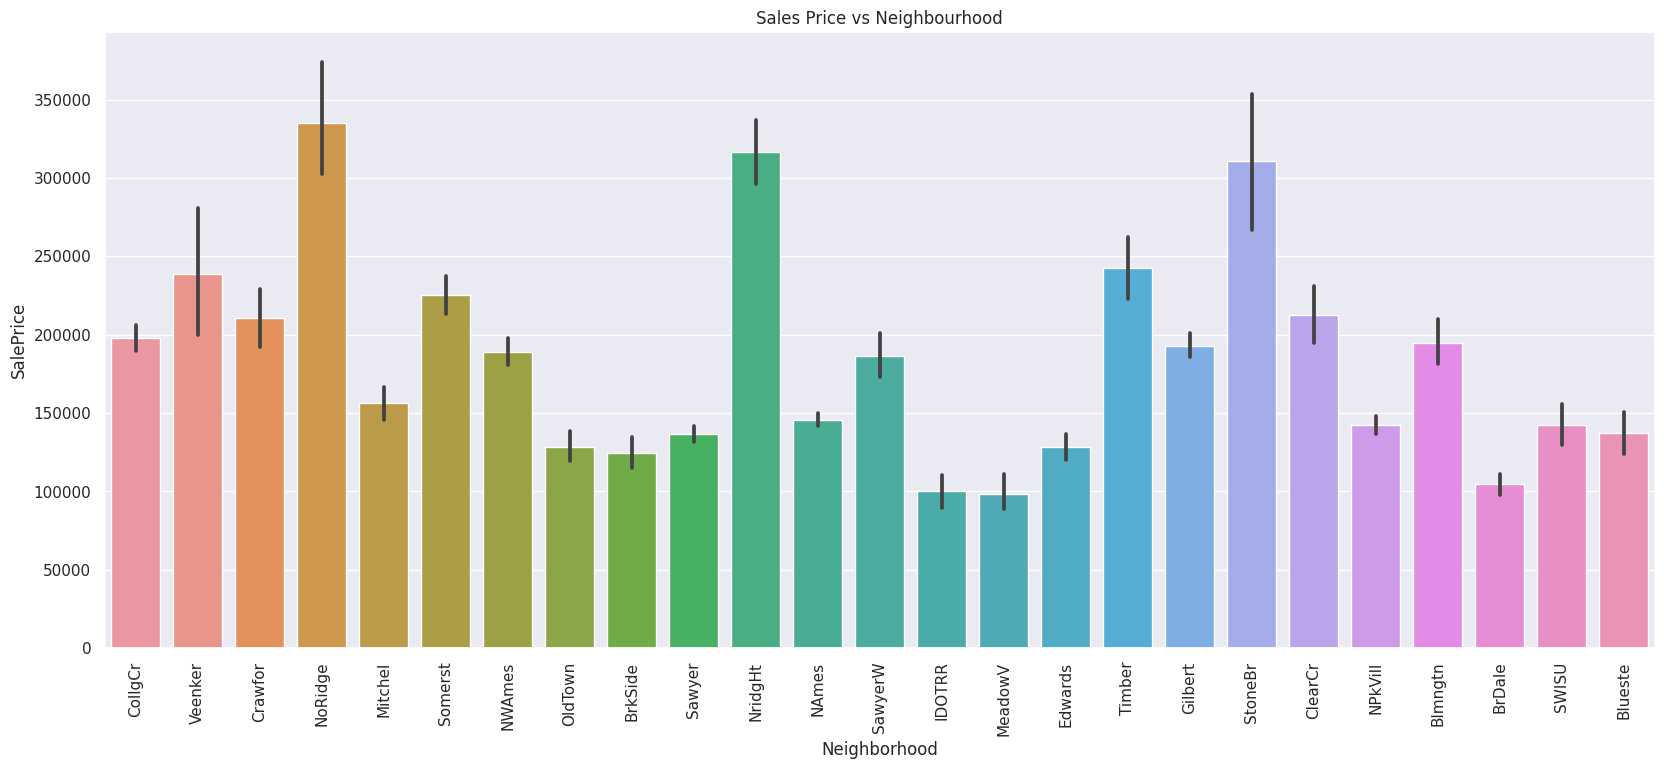

In [217]:
# plot 'Sale Price' Vs 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)

We can see prices in some of the neighbourhood like Crawfor,NridgHt,StoneBr,Timber,Blmngtn are high

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

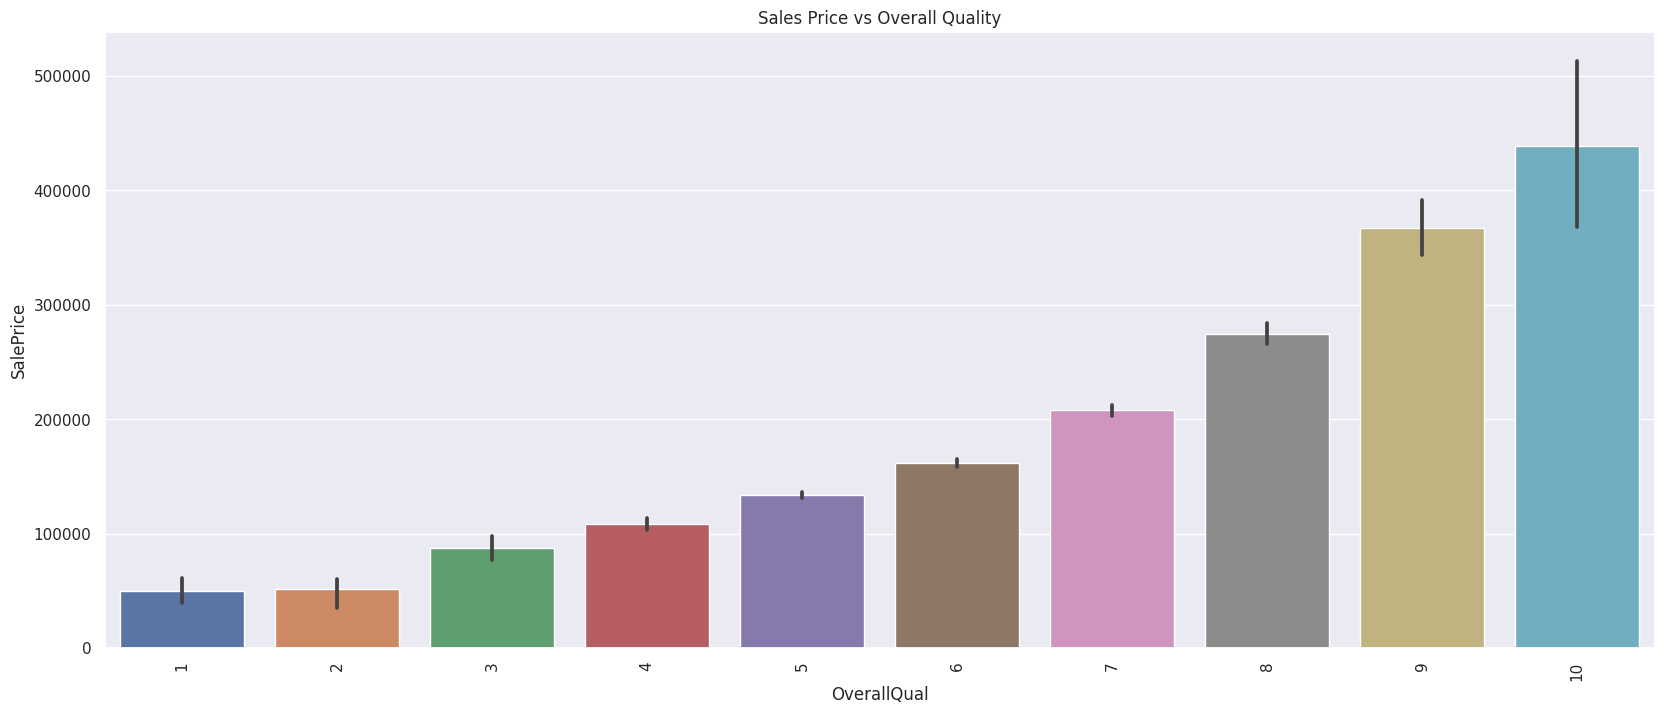

In [218]:
# plot 'overall quality' vs 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Quality")
plt.xticks(rotation=90)

As Quality increases price increase

<Axes: xlabel='SalePrice', ylabel='Density'>

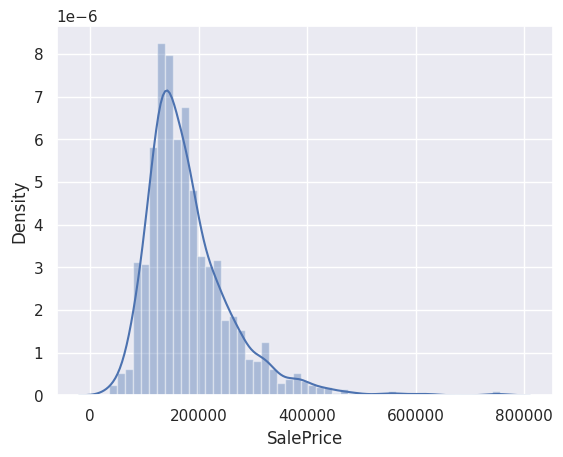

In [219]:
sns.distplot(df['SalePrice'])

We can see that data is skewed to left, hence we will apply log transformation to handle this skewness

In [220]:
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

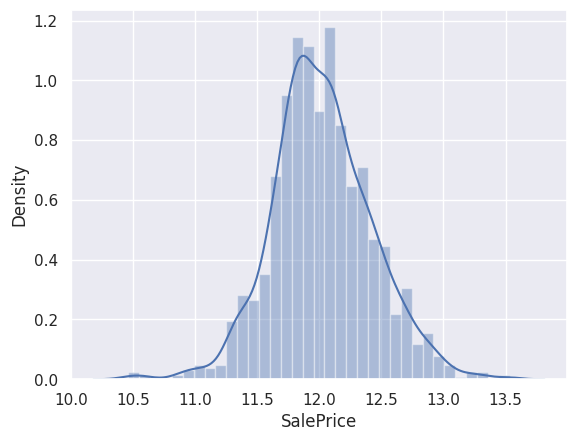

In [221]:
sns.distplot(df['SalePrice'])

We can see skewness has been handled and we have Uniform distribution

In [222]:
#Checking correlation
# cor = numeric_vars.corr()
# cor

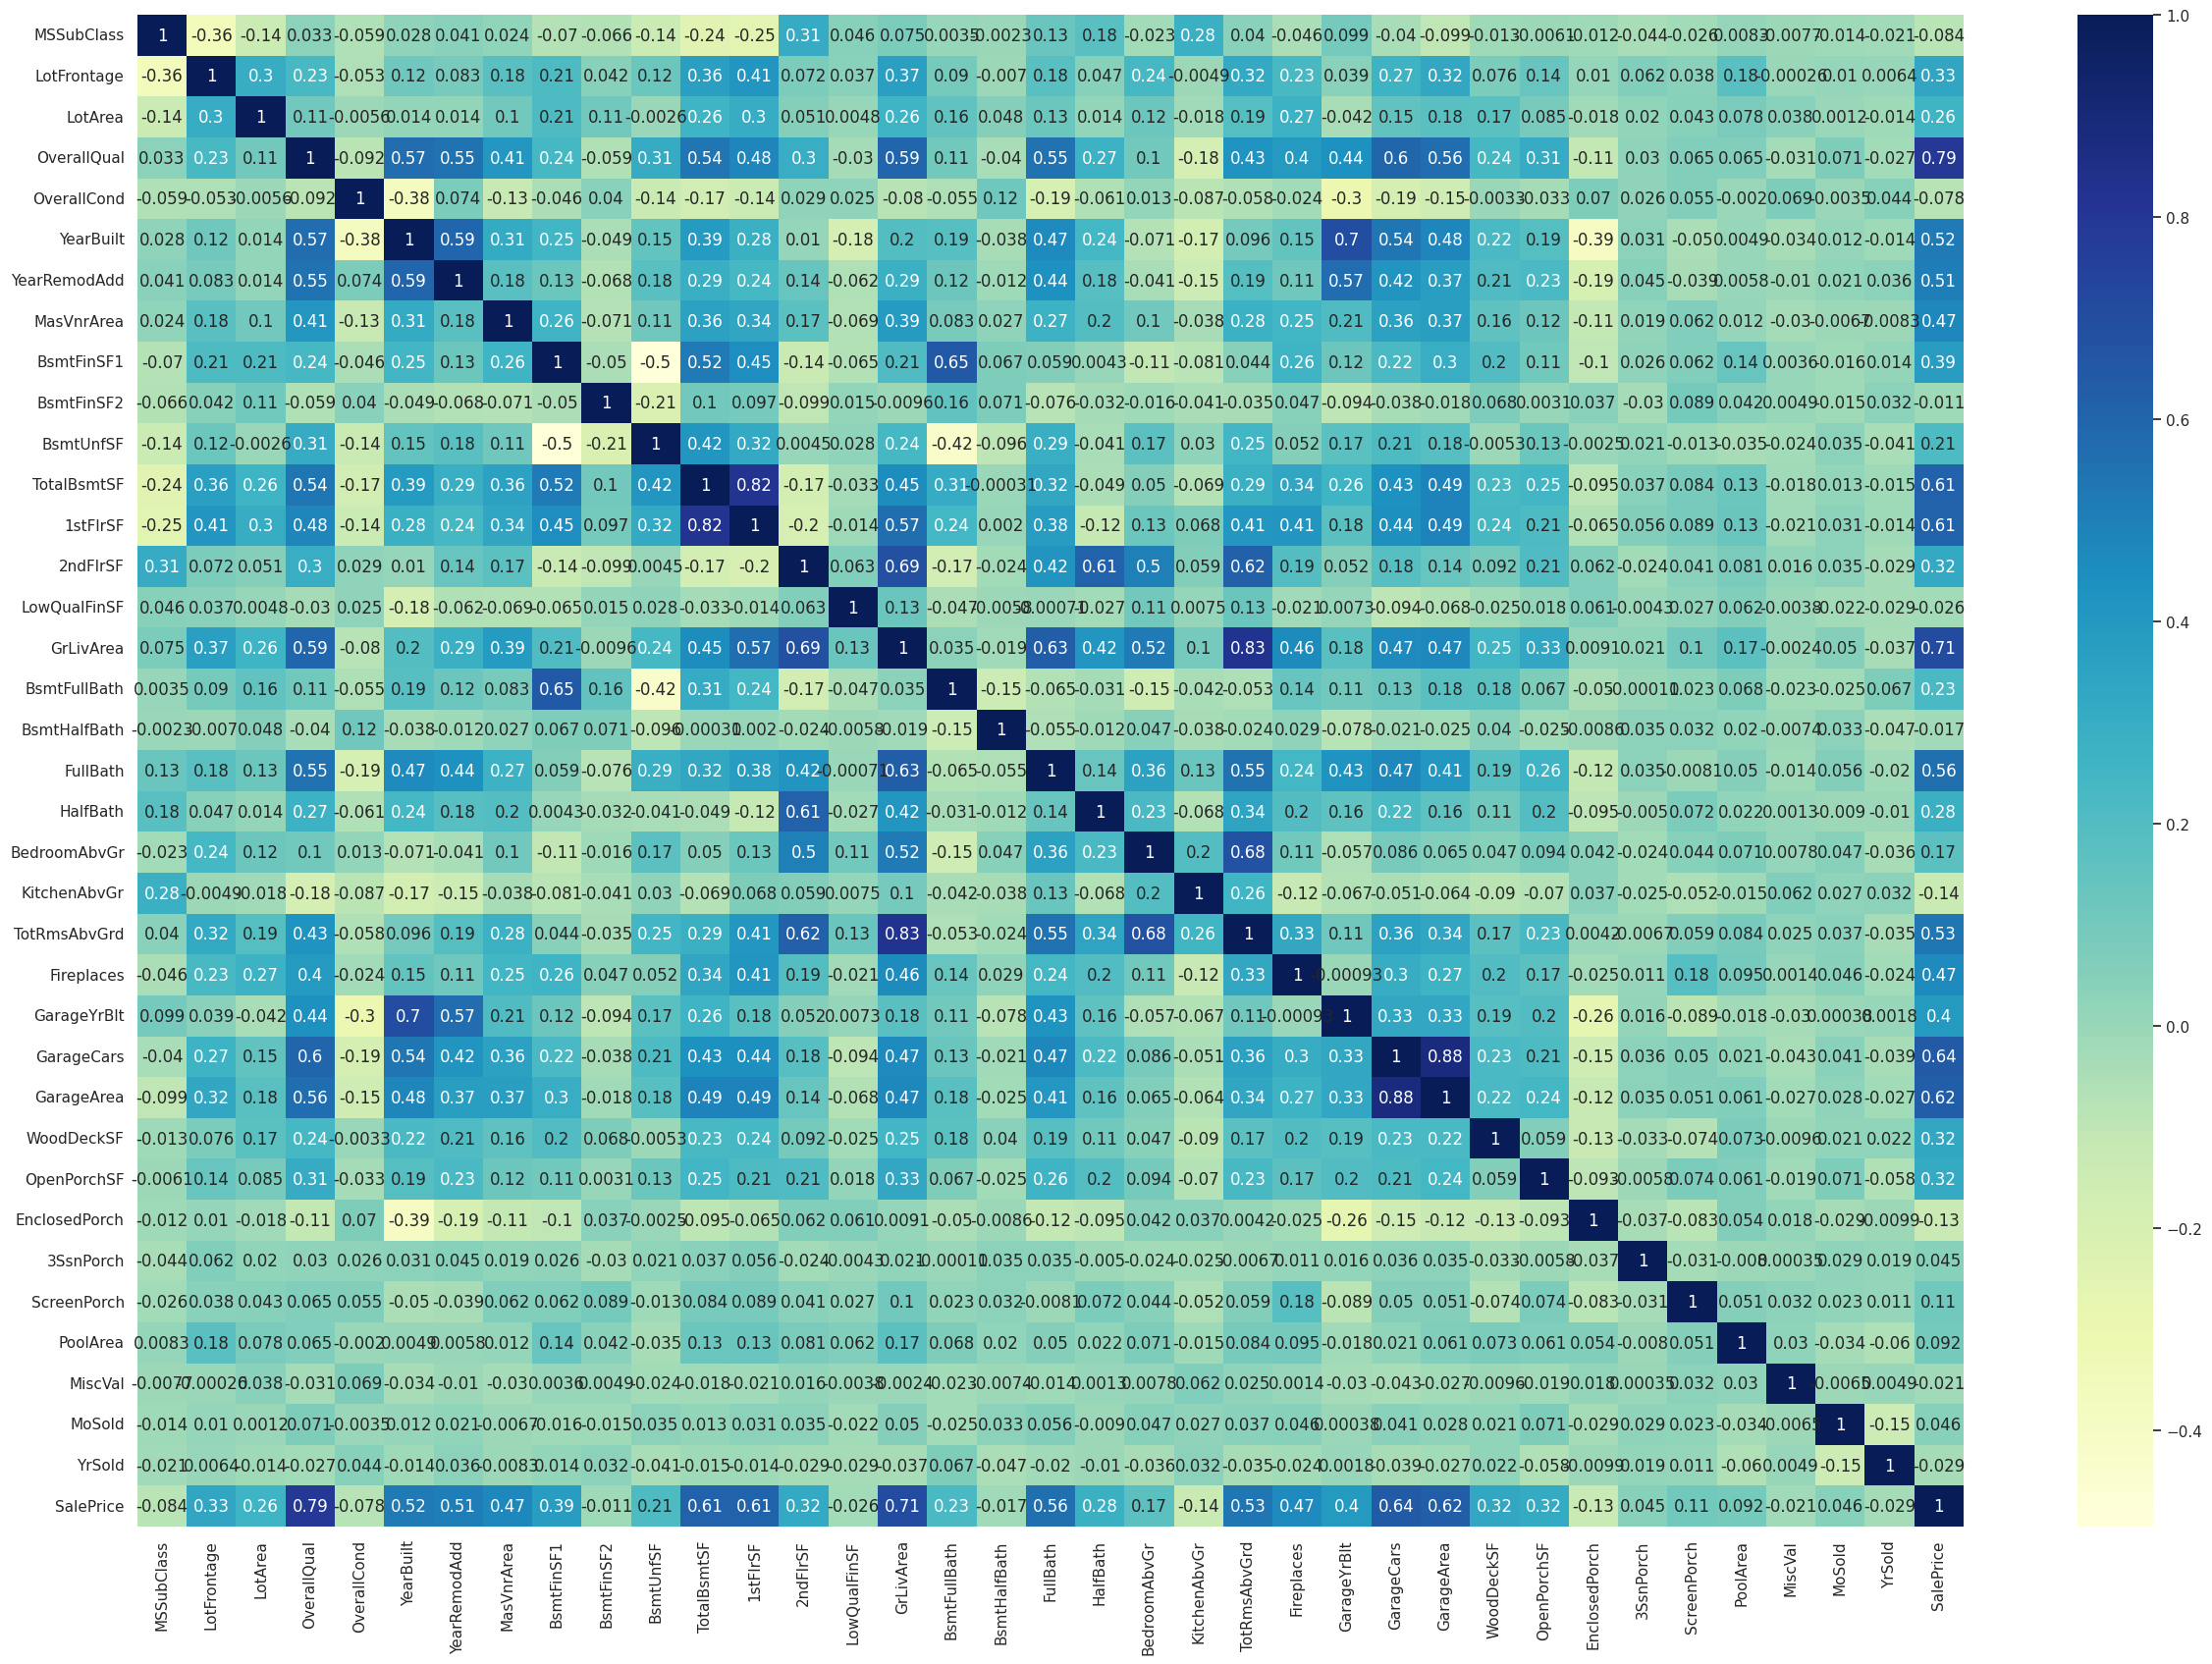

In [223]:
#Correlations on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(numeric_vars.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see
GarageCars is highly correlated with garage area,
1stFlrSF is highly correalted with TotalBsmtsf
TotRmsAbvGrd is highly correlated with GrLivArea
GarageYrBlt is highly corealted with Year built, Now we need to check pairplot of these variables

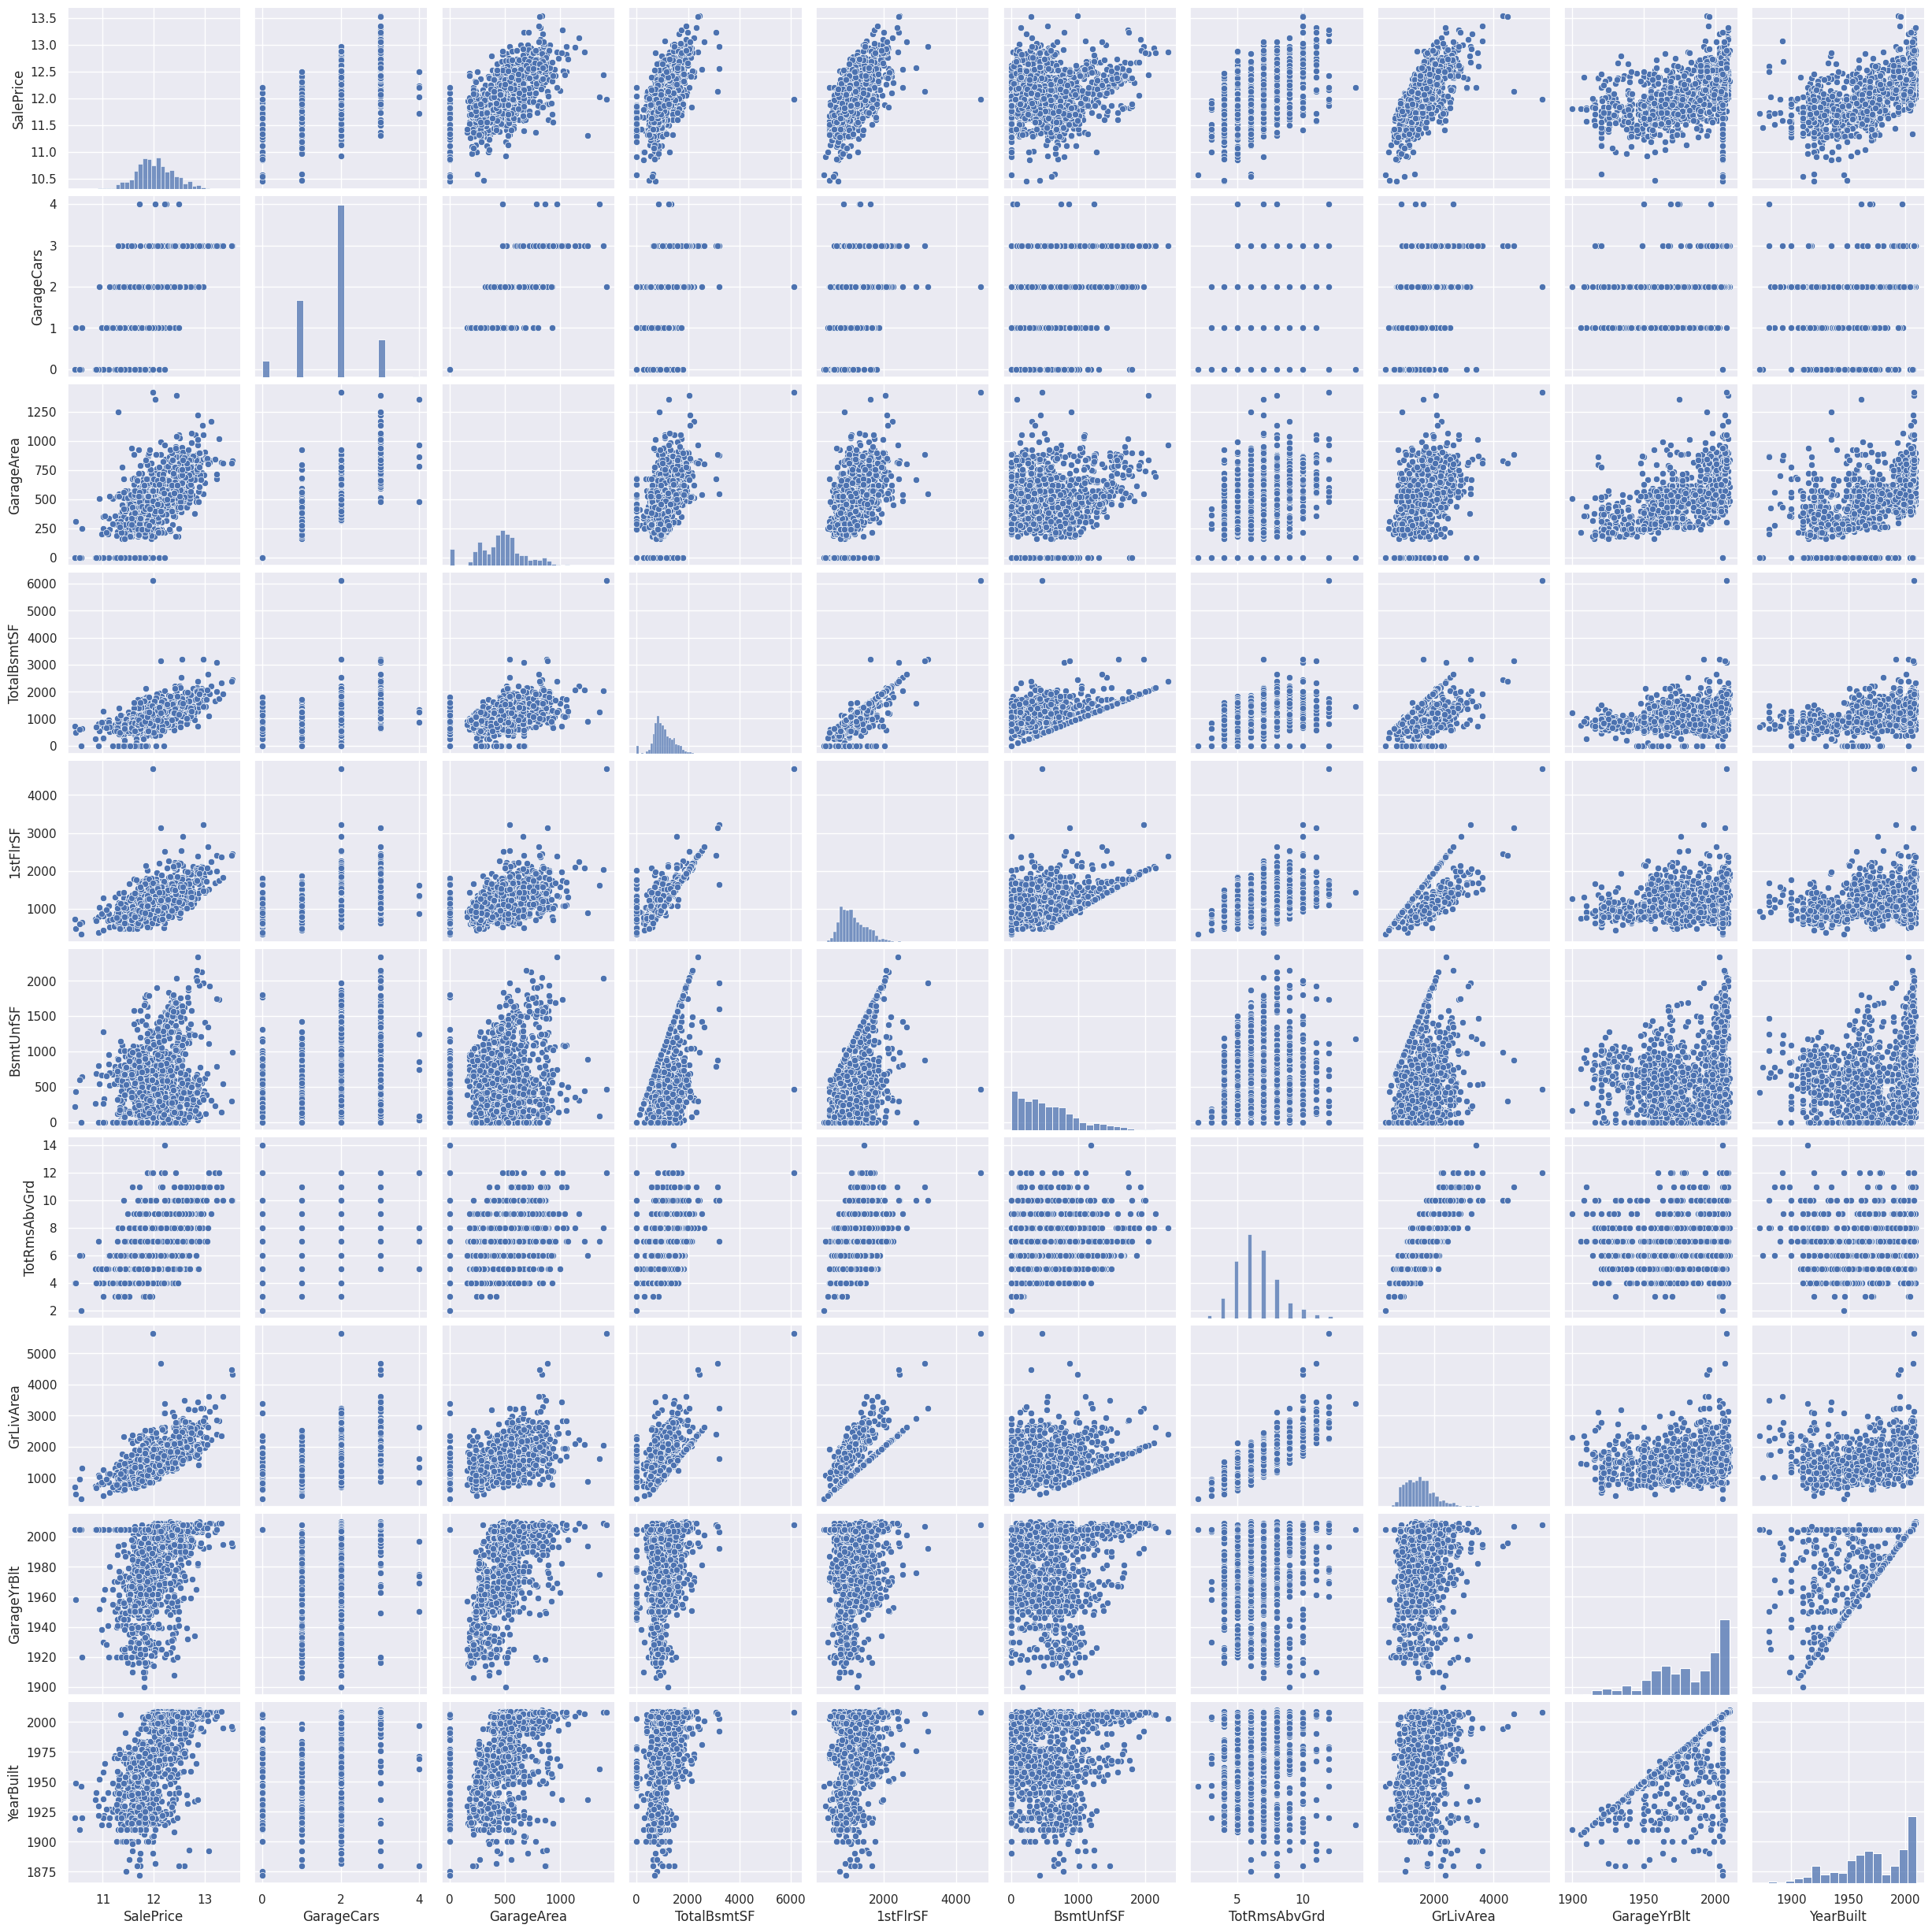

In [224]:
# Checking pairplot
sns.set()
cols = ['SalePrice', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GrLivArea', 'GarageYrBlt', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

Dropping some variables from the set of correlated variables as there is no significant contribution
from those variables in deciding sales prioce

In [225]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['1stFlrSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr       854             0       1710   
1    GasA        Ex          Y      SBrkr         0             0       1262   
2    GasA        Ex          Y      SBrkr       866             0       1786   
3    GasA        Gd          Y      SBrkr       756             0       1717   
4    GasA        Ex          Y      SBrkr      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        none     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ       

Doing analysis of individual columns plots for further more insights on variables and there relation with Sales price

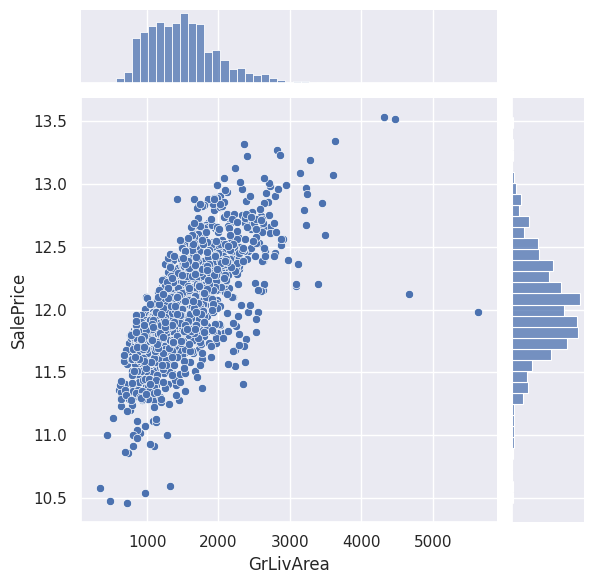

In [226]:
# GrLivArea Vs SalePrice
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

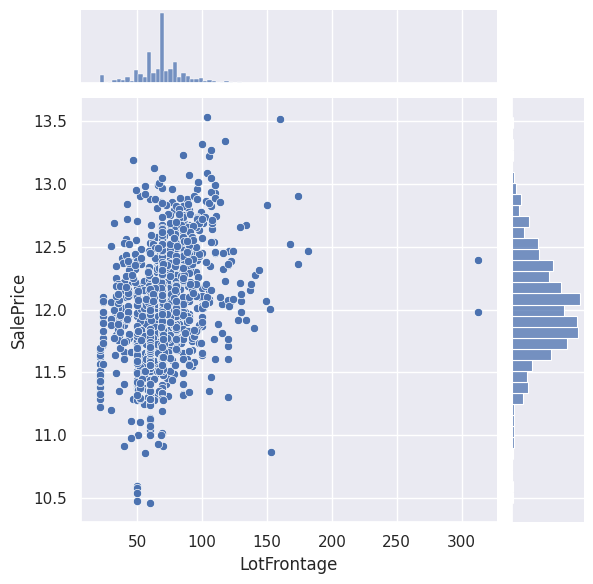

In [227]:
#We can see some outliers on the right of the chart for GrLivArea, but not dropping them as that may lead to loss
#in information due to the loss of values for other variables
#Lot frontage vs SalePrice
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

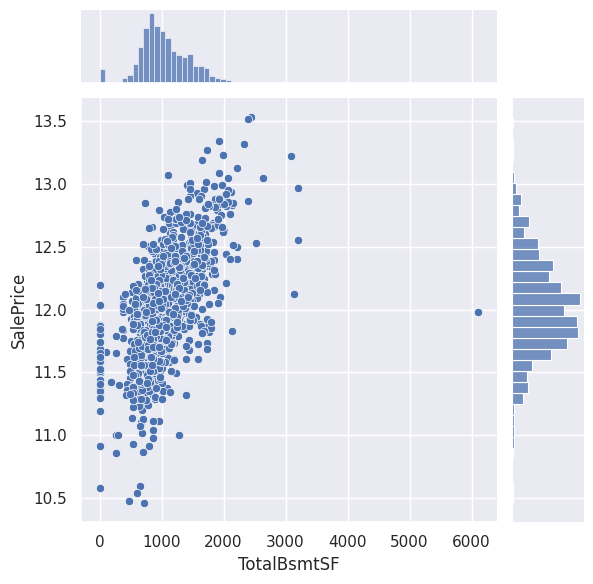

In [228]:
# TotalBsmtSF vs SalePrice
sns.jointplot(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.show()

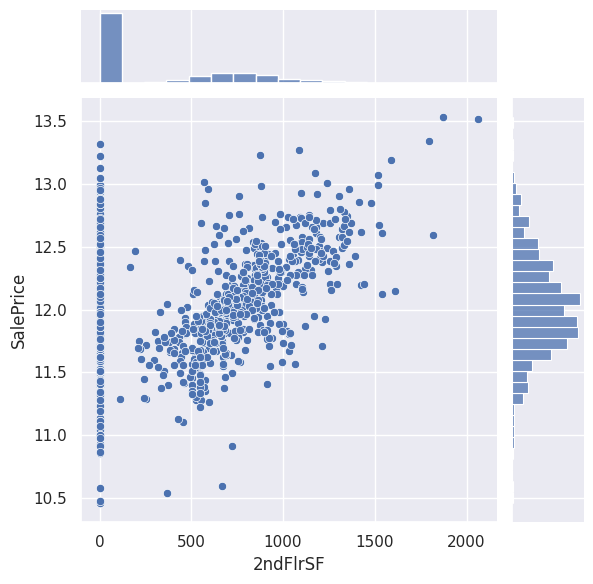

In [229]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

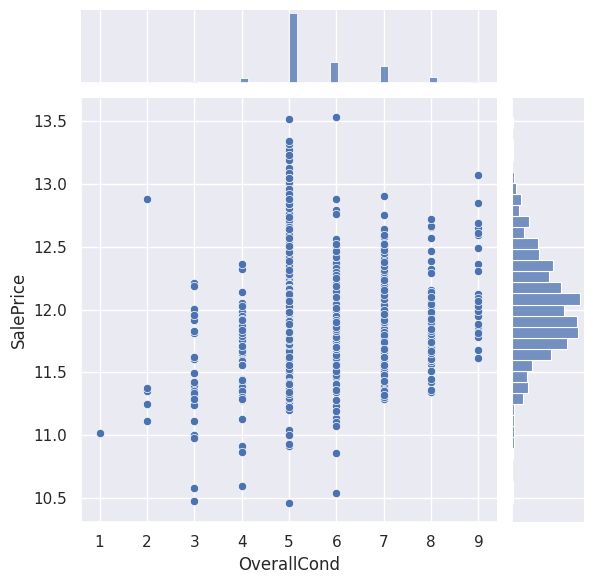

In [230]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

Derving the age of the property column as it will be difficult to handle dummy variables for builtyear variable

In [231]:
# PropAge -  Property Age from yearsold - yearbuilt
df['builtage'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr       854             0       1710   
1    GasA        Ex          Y      SBrkr         0             0       1262   
2    GasA        Ex          Y      SBrkr       866             0       1786   
3    GasA        Gd          Y      SBrkr       756             0       1717   
4    GasA        Ex          Y      SBrkr      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        none     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ       

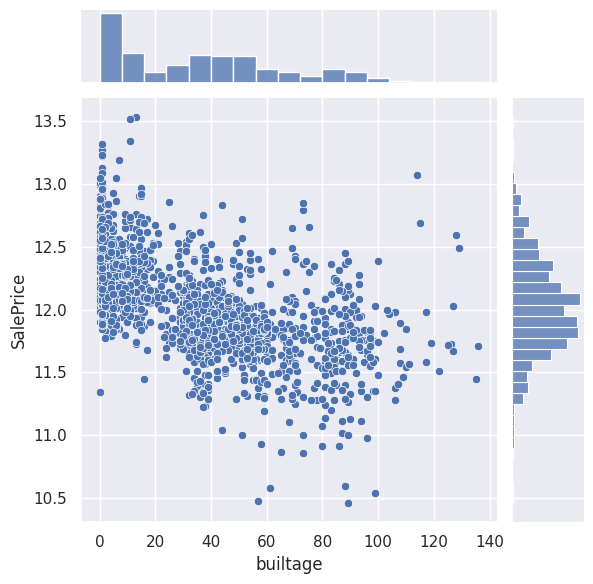

In [232]:
# builtage vs SalePrice
sns.jointplot(x = df['builtage'], y = df['SalePrice'])
plt.show()

We can see age of property has negative correlation with price in general

#Initiating Data Prep

In [233]:
#As we have the age of the property , we can drop MoSold,YrSold,YearBuilt,YearRemodAdd variables
# Dropping id column also
df = df.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd','Id'], axis = 1)
# df = df.drop(['YrSold'], axis = 1)
# df = df.drop(['YearBuilt'], axis = 1)
# df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       854             0       1710             1   
1          Y      SBrkr         0             0       1262             0   
2          Y      SBrkr       866             0       1786             1   
3          Y      SBrkr       756             0       1717             1   
4          Y      SBrkr      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA     Attchd          

In [234]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [235]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In the Street and Utilities, number of categories are very less, i.e very littile variance, hence we can drop these columns

In [236]:
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

In [237]:
df.PoolQC.value_counts()

none    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [238]:
df.Alley.value_counts()

none    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [239]:
df.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [240]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [241]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [242]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [243]:
df.GarageCond.value_counts()

TA      1326
none      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [244]:
df.Fence.value_counts()

none     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [245]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [246]:
#Above we can observe, there is not enough variation in Heating,Condition2,RoofMatl,MiscVal,PoolQC,Alley,GarageCond,Fence,Functional
#dropping these columns
df = df.drop(['Heating','Condition2','RoofMatl','MiscVal','PoolQC','Alley', 'GarageCond', 'Fence', 'Functional'], axis = 1)

In [247]:
types = df.dtypes
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [248]:
#Continious variable are either type int or float
num_type = types[(types == 'int64') | (types == float)]
#Categorical variable are type object
cat_type = types[types == object]

In [249]:
#List of numerical columns
num_var = list(num_type.index)
print(num_var)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'builtage']


In [250]:
#List of Categorical columns
cat_var = list(cat_type.index)
print(cat_var)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [251]:
# Creating dummy variables
#1 of the dummy variable is dropped as fo n categories n-1 dummy variables are needed
df = pd.get_dummies(data=df,columns=cat_var,drop_first=True)

In [252]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
0         706           0        150          856       854             0   
1         978           0        284         1262         0             0   
2         486           0        434          920       866             0   
3         216           0        540          756       756             0   
4         655           0        490         1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  builtage  \
0              0          0            0         0  12.247699         5   
1              0          0            0         0  12.109016        31   
2              0          0            0         0  12.317171         7   
3            272          0            0         0  11.849405        91   
4              0          0            0         0  12.429220         8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_Brk

#Initiating Modelling

In [253]:
X = df.drop(['SalePrice'], axis=1)

In [254]:
y = df['SalePrice']

In [255]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'builtage']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'builtage']])

In [257]:
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'builtage']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'builtage']])

In [258]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
175    -0.870387     0.637608  0.166080    -0.059996     1.252715   -0.575015   
1408    0.304785    -0.424957 -0.261043    -1.501313     1.252715   -0.575015   
1148   -0.165284    -0.026495 -0.439778     0.660663     1.252715   -0.575015   
861     3.125199     0.239147  0.079341    -0.780655    -1.406374   -0.575015   
220    -0.870387     0.150599 -0.151525     0.660663    -0.520011   -0.575015   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
175     0.085426   -0.283127   0.361507     0.347365 -0.797551     -0.121406   
1408   -0.943351   -0.283127   0.126620    -0.973680  0.630928     -0.121406   
1148   -0.943351   -0.283127   0.012597    -1.087563  0.440311     -0.121406   
861     0.870488   -0.283127  -0.840294    -0.023894 -0.797551     -0.121406   
220    -0.943351   -0.283127   2.124300     1.021554 -0.797551     -0.121406   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
175    1.229791      1.105326     -0.232279  0.786946 -0.751723      1.407703   
1408  -0.279140     -0.807450     -0.232279 -1.006519 -0.751723      0.176114   
1148  -0.757443     -0.807450     -0.232279 -1.006519 -0.751723     -1.055475   
861   -0.894101      1.105326     -0.232279 -1.006519  1.246998      0.176114   
220   -0.022906     -0.807450     -0.232279  0.786946 -0.751723     -1.055475   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
175      -0.212991    0.622339    0.478002   -0.740805    -0.261563   
1408     -0.212991   -0.935034    0.256615   -0.740805    -0.721923   
1148     -0.212991    0.622339   -0.850325   -0.740805    -0.721923   
861      -0.212991   -0.935034    0.145921   -0.740805    -0.721923   
220      -0.212991   -0.935034    0.934615    2.124358    -0.198065   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  builtage  MSZoning_FV  \
175        0.282917  -0.110736    -0.260661 -0.062302  0.660066            0   
1408      -0.358041  -0.110736     3.016768 -0.062302  2.066739            0   
1148       2.534487  -0.110736    -0.260661 -0.062302  1.477899            0   
861       -0.358041  -0.110736    -0.260661 -0.062302  0.267506            0   
220       -0.358041  -0.110736    -0.260661 -0.062302 -1.204594            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
175             0            1            0             0             0   
1408            0            0            1             0             0   
1148            0            0            1             0             0   
861             0            1            0             0             0   
220             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
175              1                0                0                1   
1408             1                0                0                1   
1148             1                0                0                1   
861              1                0                0                1   
220              0                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
175                   0              0              0                 0   
1408                  0              0              0                 1   
1148                  0              0              0                 1   
861                   0              0              0                 1   
220                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
175               0              0                     0                    0   
1408              0              0                     0                    0   
1148              0              0                     0   

In [259]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [260]:
# Running RFE
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables


LinearRegression()

In [261]:
rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)


In [262]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 29),
 ('LotFrontage', False, 105),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 100),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 97),
 ('LowQualFinSF', False, 109),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 20),
 ('HalfBath', False, 36),
 ('BedroomAbvGr', False, 64),
 ('KitchenAbvGr', False, 71),
 ('Fireplaces', False, 76),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 80),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 78),
 ('3SsnPorch', False, 91),
 ('ScreenPorch', False, 77),
 ('PoolArea', False, 38),
 ('builtage', False, 47),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 31),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 84),
 ('LandContour_HLS', True, 1),
 (

In [263]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_Twnhs', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Stucco', 'Exteri

In [264]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageFinish_Unf', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'PavedDrive_Y', 'MiscFeature_TenC', 'MiscFeature_none',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD'],
      dtype='object', length=111)

In [265]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [266]:
X_train_rfe = pd.DataFrame(X_train[col])

In [267]:
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
175   0.166080    -0.059996     1.252715    0.085426   -0.283127   0.361507   
1408 -0.261043    -1.501313     1.252715   -0.943351   -0.283127   0.126620   
1148 -0.439778     0.660663     1.252715   -0.943351   -0.283127   0.012597   
861   0.079341    -0.780655    -1.406374    0.870488   -0.283127  -0.840294   
220  -0.151525     0.660663    -0.520011   -0.943351   -0.283127   2.124300   

      TotalBsmtSF  GrLivArea  BsmtFullBath  GarageArea  MSZoning_FV  \
175      0.347365   1.229791      1.105326    0.478002            0   
1408    -0.973680  -0.279140     -0.807450    0.256615            0   
1148    -1.087563  -0.757443     -0.807450   -0.850325            0   
861     -0.023894  -0.894101      1.105326    0.145921            0   
220      1.021554  -0.022906     -0.807450    0.934615            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR3  LandContour_HLS  \
175             0            1            0             0                0   
1408            0            0            1             0                0   
1148            0            0            1             0                0   
861             0            1            0             0                0   
220             0            1            0             0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR3  LandSlope_Mod  \
175                 1                  0              0              0   
1408                1                  0              0              0   
1148                1                  0              0              0   
861                 1                  0              0              0   
220                 1                  0              0              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_ClearCr  \
175               0                     0                     0   
1408              0                     0                     0   
1148              0                     0                     0   
861               0                     0                     0   
220               0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
175                      0                     1                     0   
1408                     0                     0                     0   
1148                     0                     0                     0   
861                      0                     0                     0   
220                      0                     0                     0   

      Neighborhood_NPkVill  Neighborhood_NoRidge  Neighborhood_NridgHt  \
175                      0                     0                     0   
1408                     0                     0                     0   
1148                     0                     0                     0   
861                      0                     0                     0   
220                      0                     0                     0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
175                      0                    0                     0   
1408                     0                    0                     0   
1148                     0                    0                     0   
861                      0                    0                     0   
220                      0                    0                     0   

      Condition1_Norm  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  \
175                 1                0                0                0   
1408                1                0                0                0   
1148                1                0                0                0   
861                 1                0                0                0   
220                 1                0                0                0   

  

In [268]:
# predict
from sklearn import metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8669080930463774

In [269]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.1456007673279928e+24

In [270]:
#R2 for test is very low hence using alternate way of regression
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 29),
 ('LotFrontage', False, 105),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 100),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 97),
 ('LowQualFinSF', False, 109),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 20),
 ('HalfBath', False, 36),
 ('BedroomAbvGr', False, 64),
 ('KitchenAbvGr', False, 71),
 ('Fireplaces', False, 76),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 80),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 78),
 ('3SsnPorch', False, 91),
 ('ScreenPorch', False, 77),
 ('PoolArea', False, 38),
 ('builtage', False, 47),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 31),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 84),
 ('LandContour_HLS', True, 1),
 (

In [271]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_Twnhs', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Stucco', 'Exteri

In [272]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
930  -0.211538     1.358461    -0.509551   -1.009468   -0.301886   1.966023   
530   0.029981    -0.099887    -0.509551    0.743814   -0.301886   0.245748   
1291 -1.583933    -0.829061     1.350309   -0.518001   -0.301886  -0.375958   
1385 -0.872447    -1.558235     2.280239    0.634091   -0.301886  -1.129135   
305   0.065215     1.358461    -0.509551    2.300508   -0.301886  -0.070676   

      TotalBsmtSF  GrLivArea  BsmtFullBath  GarageArea  MSZoning_FV  \
930      0.899165  -0.117457     -0.851855    0.657098            0   
530      0.887692  -0.035051      1.111895    0.608692            0   
1291    -1.019124  -0.431748     -0.851855   -1.017758            0   
1385    -0.638220  -0.715377      1.111895   -1.133933            0   
305      2.124484   0.905907      1.111895    2.002793            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR3  LandContour_HLS  \
930             0            1            0             0                1   
530             0            1            0             0                0   
1291            0            0            1             0                0   
1385            0            0            1             0                0   
305             0            1            0             0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR3  LandSlope_Mod  \
930                 0                  0              0              0   
530                 1                  0              0              0   
1291                1                  0              0              0   
1385                1                  0              0              0   
305                 1                  0              0              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_ClearCr  \
930               0                     0                     0   
530               0                     0                     0   
1291              0                     0                     0   
1385              0                     0                     0   
305               0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
930                      0                     0                     0   
530                      0                     0                     0   
1291                     0                     0                     0   
1385                     0                     0                     0   
305                      0                     0                     0   

      Neighborhood_NPkVill  Neighborhood_NoRidge  Neighborhood_NridgHt  \
930                      0                     0                     0   
530                      0                     0                     0   
1291                     0                     0                     0   
1385                     0                     0                     0   
305                      0                     0                     0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
930                      0                    1                     0   
530                      0                    1                     0   
1291                     0                    0                     0   
1385                     0                    0                     0   
305                      0                    0                     0   

      Condition1_Norm  Condition1_PosN  Condition1_RRAn  Condition1_RRNe  \
930                 1                0                0                0   
530                 1                0                0                0   
1291                1                0                0                0   
1385                1                0                0                0   
305                 1                0                0                0   

  

# **Now Implementing Ridge and Lasso Regression**

#Starting with Lasso Regression

In [273]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [274]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.102389      0.033121         0.007164        0.001908      0.0001   
1       0.029864      0.009816         0.007239        0.002459       0.001   
2       0.022415      0.001380         0.014408        0.002137        0.01   
3       0.010580      0.000247         0.004932        0.000176        0.05   
4       0.016665      0.005168         0.008919        0.003585         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.100306          -0.083116          -0.102396   
1   {'alpha': 0.001}          -0.090722          -0.084875          -0.097511   
2    {'alpha': 0.01}          -0.104682          -0.098767          -0.100490   
3    {'alpha': 0.05}          -0.136992          -0.122182          -0.131599   
4     {'alpha': 0.1}          -0.168605          -0.146735          -0.166179   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.103787          -0.095399        -0.097001        0.007503   
1          -0.103724          -0.085524        -0.092471        0.007225   
2          -0.112491          -0.091585        -0.101603        0.006895   
3          -0.139737          -0.116907        -0.129484        0.008689   
4          -0.180801          -0.148574        -0.162179        0.012866   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.072138           -0.077658   
1                1           -0.081953           -0.085047   
2                3           -0.099856           -0.102424   
3                4           -0.130395           -0.132817   
4                5           -0.163096           -0.163347   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.073104           -0.064418           -0.072801   
1           -0.081165           -0.073898           -0.082341   
2           -0.098819           -0.088058           -0.101073   
3           -0.129338           -0.119569           -0.132697   
4           -0.160172           -0.157389           -0.164735   

   mean_train_score  std_train_score  
0         -0.072024         0.004275  
1         -0.080881         0.003728  
2         -0.098046         0.005137  
3         -0.128963         0.004883  
4         -0.161748         0.002638

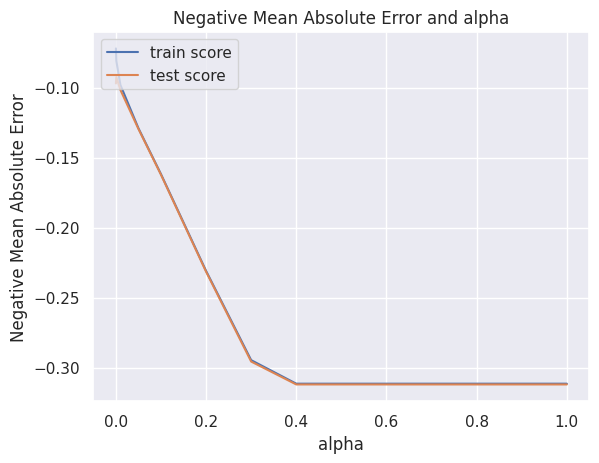

In [275]:
# Plotting mean scores of test and train with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see at alpha=0.4 Negative Mean Absolute Error is quite low,in order to balance the trade off between bias vs variance and top get the coefficients of smallest feature we will choose lower value of alpha

In [276]:
# At alpha = 0.01

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01895254,  0.        ,  0.01473102,  0.13129671,  0.04860147,
        0.        ,  0.0065651 ,  0.        , -0.        ,  0.02009549,
        0.        , -0.        ,  0.11971063,  0.02915462,  0.        ,
        0.02113604,  0.00040548,  0.        , -0.00504587,  0.02671109,
        0.04560369,  0.00848234,  0.        ,  0.        ,  0.        ,
        0.00788884, -0.0198715 , -0.09017122,  0.        ,  0.        ,
        0.01084395, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

We can see lot of insignificant coefficients are reduced to zero in this model

In [277]:
# Lasso Model Parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 12.01),
 ('MSSubClass', -0.019),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.131),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.007),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.02),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.12),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.021),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.027),
 ('GarageArea', 0.046),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('builtage', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.011),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 

In [278]:
# Initiating Lasso Regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8610840162945473
0.8503509026605941


In [279]:
print('RMSE->', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE-> 0.1537183805983421


We can see R2 values for train and test are very close indicating an optimum model

In [280]:
mod_coef = list(zip(cols, model_params))

In [281]:
params = pd.DataFrame(mod_coef)
params.columns = ['Variable', 'Coeff']
params = params.sort_values((['Coeff']), axis = 0, ascending = False)
params.head()

Variable   Coeff
0      constant  12.010
4   OverallQual   0.131
13    GrLivArea   0.120
5   OverallCond   0.049
21   GarageArea   0.046

In [282]:
# Selecting variables with non-zero coefficients
pred = pd.DataFrame(params[(params['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.010
4    OverallQual   0.131
13     GrLivArea   0.120
5    OverallCond   0.049
21    GarageArea   0.046
14  BsmtFullBath   0.029
20    Fireplaces   0.027
16      FullBath   0.021
10   TotalBsmtSF   0.020
3        LotArea   0.015
31   MSZoning_RL   0.011
26   ScreenPorch   0.008
22    WoodDeckSF   0.008
7     BsmtFinSF1   0.007
19  KitchenAbvGr  -0.005
1     MSSubClass  -0.019
27      PoolArea  -0.020
28      builtage  -0.090

Based on Lasso Regression 17 variables obtained above have strongest effect on Sales Price

In [283]:
Lassso_vars = list(pred['Variable'])
print(Lassso_vars)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'ScreenPorch', 'WoodDeckSF', 'BsmtFinSF1', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'builtage']


In [284]:
X_train_lasso = X_train[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'ScreenPorch', 'WoodDeckSF', 'BsmtFinSF1', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'builtage']]

X_train_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageArea  BsmtFullBath  \
175     -0.059996   1.229791     1.252715    0.478002      1.105326   
1408    -1.501313  -0.279140     1.252715    0.256615     -0.807450   
1148     0.660663  -0.757443     1.252715   -0.850325     -0.807450   
861     -0.780655  -0.894101    -1.406374    0.145921      1.105326   
220      0.660663  -0.022906    -0.520011    0.934615     -0.807450   

      Fireplaces  FullBath  TotalBsmtSF   LotArea  MSZoning_RL  ScreenPorch  \
175     0.622339  0.786946     0.347365  0.166080            1    -0.260661   
1408   -0.935034 -1.006519    -0.973680 -0.261043            0     3.016768   
1148    0.622339 -1.006519    -1.087563 -0.439778            0    -0.260661   
861    -0.935034 -1.006519    -0.023894  0.079341            1    -0.260661   
220    -0.935034  0.786946     1.021554 -0.151525            1    -0.260661   

      WoodDeckSF  BsmtFinSF1  KitchenAbvGr  MSSubClass  PoolArea  builtage  
175    -0.740805    0.085426     -0.212991   -0.870387 -0.062302  0.660066  
1408   -0.740805   -0.943351     -0.212991    0.304785 -0.062302  2.066739  
1148   -0.740805   -0.943351     -0.212991   -0.165284 -0.062302  1.477899  
861    -0.740805    0.870488     -0.212991    3.125199 -0.062302  0.267506  
220     2.124358   -0.943351     -0.212991   -0.870387 -0.062302 -1.204594

In [285]:
X_test_lasso = X_test[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'ScreenPorch', 'WoodDeckSF', 'BsmtFinSF1', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'builtage']]

X_test_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageArea  BsmtFullBath  \
930      1.358461  -0.117457    -0.509551    0.657098     -0.851855   
530     -0.099887  -0.035051    -0.509551    0.608692      1.111895   
1291    -0.829061  -0.431748     1.350309   -1.017758     -0.851855   
1385    -1.558235  -0.715377     2.280239   -1.133933      1.111895   
305      1.358461   0.905907    -0.509551    2.002793      1.111895   

      Fireplaces  FullBath  TotalBsmtSF   LotArea  MSZoning_RL  ScreenPorch  \
930    -0.987888  0.798671     0.899165 -0.211538            1    -0.293788   
530     0.551952  0.798671     0.887692  0.029981            1    -0.293788   
1291   -0.987888  0.798671    -1.019124 -1.583933            0    -0.293788   
1385   -0.987888 -1.072013    -0.638220 -0.872447            0    -0.293788   
305    -0.987888  0.798671     2.124484  0.065215            1    -0.293788   

      WoodDeckSF  BsmtFinSF1  KitchenAbvGr  MSSubClass  PoolArea  builtage  
930    -0.019795   -1.009468     -0.208108   -0.879672 -0.082098 -1.150291  
530     0.924930    0.743814     -0.208108    0.559791 -0.082098 -0.539797  
1291    0.627799   -0.518001     -0.208108    2.479076 -0.082098  0.036781  
1385   -0.781670    0.634091     -0.208108   -0.159940 -0.082098  1.766516  
305     0.498280    2.300508     -0.208108   -0.879672 -0.082098 -1.116375

In [286]:
X_train_lasso.shape

(1021, 17)

In [287]:
X_test_lasso.shape

(438, 17)

Initiating Ridge Regression

In [288]:
# Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [289]:
ridge = Ridge()

In [290]:
# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [291]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.016468      0.007116         0.006592        0.002637      0.0001   
1       0.025278      0.000921         0.009468        0.001405       0.001   
2       0.020202      0.010047         0.006964        0.002381        0.01   
3       0.012228      0.000180         0.004917        0.000120        0.05   
4       0.019674      0.006317         0.007022        0.002461         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.112532          -0.088433          -0.110441   
1   {'alpha': 0.001}          -0.112500          -0.088406          -0.110406   
2    {'alpha': 0.01}          -0.112192          -0.088161          -0.110061   
3    {'alpha': 0.05}          -0.110984          -0.087218          -0.108838   
4     {'alpha': 0.1}          -0.109806          -0.086380          -0.107845   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.107729          -0.102818        -0.104391        0.008616   
1          -0.107711          -0.102753        -0.104355        0.008616   
2          -0.107548          -0.102200        -0.104032        0.008609   
3          -0.107014          -0.100636        -0.102938        0.008586   
4          -0.106583          -0.099423        -0.102007        0.008564   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.070517           -0.075567   
1               26           -0.070518           -0.075569   
2               25           -0.070525           -0.075590   
3               24           -0.070572           -0.075725   
4               23           -0.070675           -0.075909   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.071693           -0.062156           -0.071644   
1           -0.071692           -0.062158           -0.071648   
2           -0.071691           -0.062180           -0.071682   
3           -0.071718           -0.062275           -0.071813   
4           -0.071828           -0.062395           -0.071944   

   mean_train_score  std_train_score  
0         -0.070315         0.004424  
1         -0.070317         0.004424  
2         -0.070333         0.004423  
3         -0.070421         0.004430  
4         -0.070550         0.004446

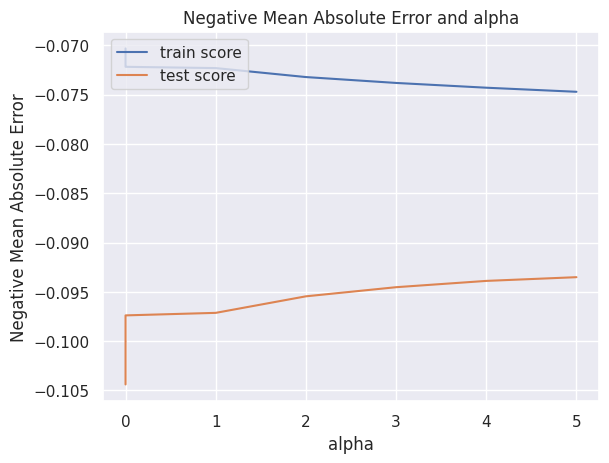

In [292]:
# Plotting mean scores of test and train with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We will choose alpha=2 as we can see in the above grapha mean absolute error stablizes after 2

In [293]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01251895, -0.00602369,  0.02569666,  0.07949591,  0.05186665,
        0.00230676, -0.00990265,  0.00678819,  0.00111616, -0.00685155,
       -0.0030179 , -0.00302781,  0.12683384,  0.02868863,  0.00264195,
        0.0326198 ,  0.01935894,  0.01464199, -0.00956207, -0.00756433,
        0.02926686,  0.00921023,  0.00472193,  0.0111953 ,  0.00537837,
        0.0121583 , -0.01511577, -0.04140933,  0.12581499,  0.13584706,
        0.11808232,  0.0820174 ,  0.02055407, -0.08637571,  0.00523342,
        0.01809425,  0.0031172 ,  0.01993555,  0.03198404, -0.04178932,
       -0.04785319, -0.01609117,  0.01149402, -0.06114185, -0.04276105,
       -0.05349686,  0.01981092,  0.04570284, -0.01903839,  0.10161103,
       -0.09786205, -0.01982629, -0.09168647, -0.14509627, -0.03815655,
       -0.01841815,  0.00165699, -0.03890488,  0.07332206,  0.07809184,
       -0.04827662,  0.01200585, -0.01362343, -0.00337959,  0.02902825,
        0.101938  ,  0.01210343,  0.03643166, -0.0079788 ,  0.05

In [294]:
# ridge model parameters
model_params = list(ridge.coef_)
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 11.715),
 ('MSSubClass', -0.013),
 ('LotFrontage', -0.006),
 ('LotArea', 0.026),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.01),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', 0.001),
 ('TotalBsmtSF', -0.007),
 ('2ndFlrSF', -0.003),
 ('LowQualFinSF', -0.003),
 ('GrLivArea', 0.127),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.033),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.015),
 ('builtage', -0.041),
 ('MSZoning_FV', 0.126),
 ('MSZoning_RH', 0.136),
 ('MSZoning_RL', 0.118),
 ('MSZoning_RM', 0.082),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.086),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.018),
 ('LandContour_Low', 0.003),
 ('LandContour_Lvl', 0.02),
 ('LotConfig_CulDSac', 0.032)

In [295]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9230903090123561
0.8751157723036238


In [296]:
print('RMSE for Ridge ->', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for Ridge -> 0.14042439000796203


By comparing R2 values for Lasso and Ridge, it is visible Ridge is slightly better in terms of predicting the Sales Price also difference between the Test and Train R2 value is approximately 0.05 which is in acceptable range

In [297]:
# Ridge Coefficients
model_ridge = list(zip(cols, model_params))

In [298]:
param_ridge = pd.DataFrame(model_ridge)
param_ridge.columns = ['Variable', 'Coeff']
res=param_ridge.sort_values(by=['Coeff'], ascending = False)
param_ridge = param_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.715
30            MSZoning_RH   0.136
13              GrLivArea   0.127
29            MSZoning_FV   0.126
31            MSZoning_RL   0.118
205          SaleType_Oth   0.104
66   Neighborhood_StoneBr   0.102
50   Neighborhood_Crawfor   0.102
136      Foundation_Stone   0.101
95    Exterior1st_BrkFace   0.100
111   Exterior2nd_CmentBd   0.089
32            MSZoning_RM   0.082
4             OverallQual   0.079
60   Neighborhood_NridgHt   0.078
204          SaleType_New   0.078
91      RoofStyle_Mansard   0.076
59   Neighborhood_NoRidge   0.073
208  SaleCondition_Alloca   0.073
166          CentralAir_Y   0.071
210  SaleCondition_Normal   0.068

In [299]:
param_ridge

Variable   Coeff
0               constant  11.715
30           MSZoning_RH   0.136
13             GrLivArea   0.127
29           MSZoning_FV   0.126
31           MSZoning_RL   0.118
..                   ...     ...
79        BldgType_Twnhs  -0.092
83     HouseStyle_2.5Fin  -0.097
51  Neighborhood_Edwards  -0.098
94   Exterior1st_BrkComm  -0.103
54  Neighborhood_MeadowV  -0.145

[212 rows x 2 columns]

In [300]:
## since there were few coefficients at 0, we removed them from features
param_ridge = pd.DataFrame(param_ridge[(param_ridge['Coeff'] != 0)])
param_ridge

Variable   Coeff
0               constant  11.715
30           MSZoning_RH   0.136
13             GrLivArea   0.127
29           MSZoning_FV   0.126
31           MSZoning_RL   0.118
..                   ...     ...
79        BldgType_Twnhs  -0.092
83     HouseStyle_2.5Fin  -0.097
51  Neighborhood_Edwards  -0.098
94   Exterior1st_BrkComm  -0.103
54  Neighborhood_MeadowV  -0.145

[207 rows x 2 columns]

We can see that Model Performance of Ridge is slightly better than Lasso but biggest difference is number if variables in the model
Ridge has 206 variable in the model whereas Lasso has only 17.
We always go for the least complicated model provided there is not too much loss in R2 value.
Hence in this case we will go with Lasso Model

# **Final Equation is derived using Lasso Model**

Log(SalePrice)=12.010+0.131 X OverallQual+0.120 X GrLivArea+0.049 X OverallCond+0.046 X GarageArea+0.029 X BsmtFullBath+0.027 X Fireplaces+0.021 X FullBath+0.020 X TotalBsmtSF+0.015 X LotArea+0.011 X MSZoning_RL+0.008 X ScreenPorch+0.008 X WoodDeckSF+0.007 X BsmtFinSF1-0.005 X KitchenAbvGr-0.019 X MSSubClass-0.020 X PoolArea-0.090 X builtage

# **Observations and Suggestions**

Top 5 Variables affecting the SalePrice positively are

> OverallQual - Rates the overall material and finish of the house

> GrLivArea - Above grade (ground) living area square feet

> OverallCond - Rates the overall condition of the house

> GarageArea - Size of garage in square feet

> BsmtFullBath - Basement full bathrooms












Property can be bought when the market price of the property is less than that of predicted value